In [15]:
from discopy import Ty, Box, Id, Diagram

folder = lambda file: '../docs/imgs/' + file
params = dict(
    aspect='auto',
    loop=False,
    draw_types=False)

In [16]:
x = Ty('x')
copy, add = Box('copy', x, x @ x), Box('add', x @ x, x)
CX = copy @ Id(x) >> Id(x) @ add
XC = Id(x) @ copy >> add @ Id(x)
diagram = CX @ XC >> XC @ CX
rewrite_steps = diagram.normalize()

diagram.to_gif(*rewrite_steps,
               path=folder('simple-rewrite.gif'), **params)

In [17]:
from discopy.monoidal import spiral

diagram = spiral(3)
diagram.to_gif(*diagram.normalize(),
               path=folder('spiral.gif'),
               **dict(params, draw_box_labels=False, loop=True, aspect='equal'))

In [18]:
snake = Box('f', x @ x, x @ x)\
    .transpose_l().transpose_l()\
    .transpose_r().transpose_r()

snake.to_gif(*snake.normalize(), **params,
             path=folder('snake-removal.gif'))

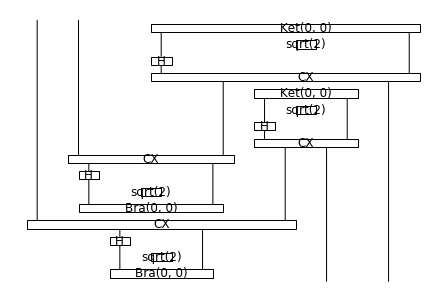

In [10]:
from discopy.circuit import Circuit, Id, PRO
snake = Id(2) @ Circuit.caps(PRO(2), PRO(2)) >> Circuit.cups(PRO(2), PRO(2)) @ Id(2)
snake.draw(draw_types=False, aspect='auto')

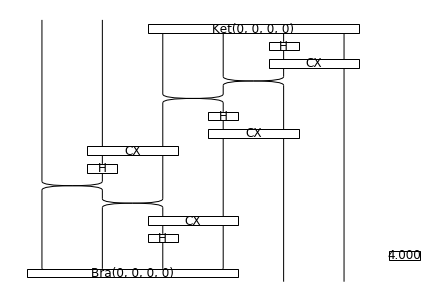

In [14]:
snake.normal_form().draw(aspect='auto')

In [12]:
rewrite_steps = tuple(snake.foliate())
print('depth = {}'.format(snake.ddepth()))
snake.to_gif(*rewrite_steps[:-1], path=folder('foliate.gif'), aspect='auto', draw_types=False)

depth = 10
